In [0]:
import torch
import numpy as np
#redes neuronales
import torch.nn as nn
#optimizaciones para calcular gradientes y hacer backward
import torch.optim as optim
#graficar
import matplotlib.pyplot as plt


#Regresion lineal
---

graficar

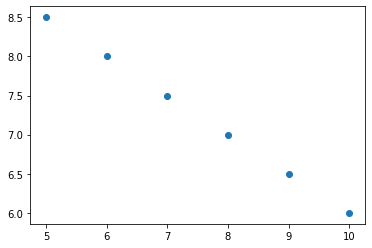

In [0]:
car_prices = [5, 6, 7, 8, 9, 10]
units_sold = [8.5, 8.0, 7.5, 7.0, 6.5, 6.0]

plt.scatter(car_prices, units_sold)

pasar de arreglos a numpy

In [0]:
prices_array = np.array(car_prices).reshape(-1, 1)
units_array = np.array(units_sold).reshape(-1, 1)

numpy a tensor

In [0]:
prices = torch.from_numpy(prices_array).float().requires_grad_(True) #gradientes que sirven para la construccion del modelo
units = torch.from_numpy(units_array).float()

#prices, prices.shape, units, units.shape

crear modelo

0.015371471643447876


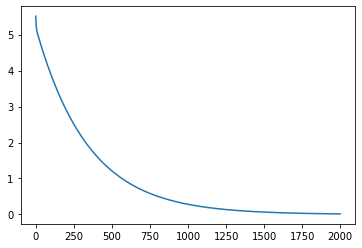

In [0]:
model = nn.Linear(1, 1) #entrenamiento de modelo de prediccion, tamaño de entrada y salida
loss_function = nn.MSELoss() #funcion de perdida, media del cuadrado de los errores
optimizer = optim.SGD(model.parameters(), lr=0.015) #calcular el gradiente, lr pasos para minimizar el gradiente
losses = []
iterations = 2000
#trainning loop
for i in range(iterations):
  #forware
  pred = model(prices) #prediccion
  loss = loss_function(pred, units) #perdida, prediccion y valor real
  losses.append(loss.data) #colocar perdida en el arreglo para graficarlo
  #backware
  optimizer.zero_grad() #reiniciar gradientes
  loss.backward()
  optimizer.step() #moverse

print(float(loss))
plt.plot(range(iterations), losses) #graficar iteraciones y losses

In [0]:
x = torch.Tensor([[4.0]])
p = model(x)
p

tensor([[8.7254]], grad_fn=<AddmmBackward>)

#Regresion logistica
---



hacer conjunto de numeros aleatorios

In [0]:
n = 100
h = n//2
dimen = 2

data = np.random.randn(n, dimen)*3

graficar los puntos aleatorios

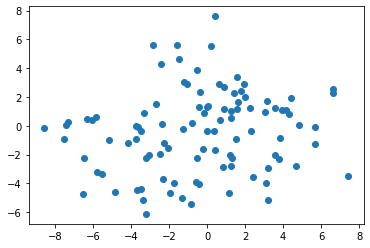

In [0]:
plt.scatter(data[:,0], data[:,1])

In [0]:
data[:h, :] = data[:h, :] - 3*np.ones((h, dimen))
data[h:, :] = data[h:, :] + 3*np.ones((h, dimen))

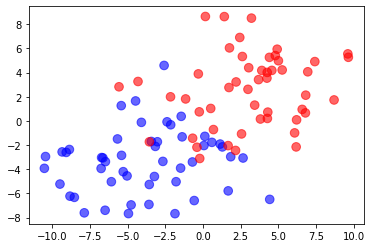

In [0]:
colors = ['blue', 'red']

color = np.array([colors[0]] * h + [colors[1]] * h).reshape(n)
plt.scatter(data[:,0], data[:,1], c=color, s=75, alpha=0.6)

In [0]:
target = np.array([0] * h + [1] * h).reshape(n, 1)

x = torch.from_numpy(data).float().requires_grad_(True)

y = torch.from_numpy(target).float()

x.shape, y.shape

(torch.Size([100, 2]), torch.Size([100, 1]))

tensor(0.2218, grad_fn=<BinaryCrossEntropyBackward>)

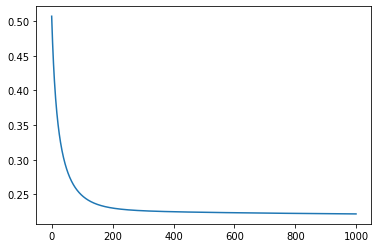

In [0]:
model = nn.Sequential( #combina funciones del modulo
    nn.Linear(2, 1), #modelo lineal
    nn.Sigmoid()) #funcion que ocila entre 0 y 1

loss_function = nn.BCELoss() #
optimizer = optim.SGD(model.parameters(), lr=0.01) #
losses = [] #
iterations = 1000 #
#learning rate
for i in range(iterations):
  #forward
  result = model(x) #modelo
  loss = loss_function(result, y) #
  losses.append(loss.data) #
  #backward
  optimizer.zero_grad() #
  loss.backward() #
  optimizer.step() #

plt.plot(range(iterations), losses)
loss

In [0]:
blue = torch.Tensor([[-5, -6]])
prediction = model(blue).data[0][0] > 0.5
print(colors[prediction])

red = torch.Tensor([[5, 6]])
prediction = model(red).data[0][0] > 0.5
print(colors[prediction])

blue
red


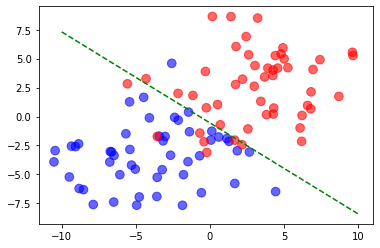

In [0]:
w = list(model.parameters())
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()

plt.scatter(data[:,0], data[:,1], c=color, s=75, alpha=0.6)

x_axis = np.linspace(-10, 10, n)
y_axis = -(w1[0] + x_axis*w0[0][0]) / w0[0][1]
plt.plot(x_axis, y_axis, 'g--')